# Employee Attrition: Exploratory Data Analysis (EDA)

### 1. Import Relevant Libraries/Packages

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
%matplotlib inline

### 2. Load Dataset and Explore Dataset

In [52]:
df = pd.read_csv('Employee-Attrition.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# statistical summary
df.describe().transpose()

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [5]:
# statistical summary of categorical columns
df.describe(include=['object']).transpose()

count unique                     top  freq
Attrition       1470      2                      No  1233
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
Over18          1470      1                       Y  1470
OverTime        1470      2                      No  1054

In [6]:
# check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# shape of the dataset
df.shape

(1470, 35)

In [8]:
# check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [9]:
# columns in the dataset
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
# top 5 records who have higtest monthly income
df.nlargest(5, 'MonthlyIncome')

Age Attrition BusinessTravel  DailyRate              Department  \
190   52        No  Travel_Rarely        699  Research & Development   
746   41        No     Non-Travel        247  Research & Development   
851   56        No  Travel_Rarely        718  Research & Development   
165   50        No  Travel_Rarely       1452  Research & Development   
568   55       Yes  Travel_Rarely        725  Research & Development   

     DistanceFromHome  Education    EducationField  EmployeeCount  \
190                 1          4     Life Sciences              1   
746                 7          1     Life Sciences              1   
851                 4          4  Technical Degree              1   
165                11          3     Life Sciences              1   
568                 2          3           Medical              1   

     EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
190             259  ...                         1            80   
746            1035  ...                         2            80   
851            1191  ...                         4            80   
165             226  ...                         2            80   
568             787  ...                         4            80   

     StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
190                 1                 34                      5   
746                 2                 21                      3   
851                 1                 28                      2   
165                 0                 21                      5   
568                 1                 24                      2   

    WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
190               3              33                 18   
746               3              21                 16   
851               3               5                  2   
165               3               5                  4   
568               3               5                  2   

     YearsSinceLastPromotion  YearsWithCurrManager  
190                       11                     9  
746                        5                    10  
851                        4                     2  
165                        4                     4  
568                        1                     4  

[5 rows x 35 columns]

In [11]:
# top 5 records who have lowest monthly income
df.nsmallest(5, 'MonthlyIncome')

Age Attrition     BusinessTravel  DailyRate              Department  \
513    20       Yes      Travel_Rarely       1362  Research & Development   
727    18        No         Non-Travel        287  Research & Development   
764    28        No      Travel_Rarely       1144                   Sales   
1338   30       Yes      Travel_Rarely        945                   Sales   
1365   29       Yes  Travel_Frequently        746                   Sales   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
513                 10          1           Medical              1   
727                  5          2     Life Sciences              1   
764                 10          1           Medical              1   
1338                 9          3           Medical              1   
1365                24          3  Technical Degree              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
513              701  ...                         4            80   
727             1012  ...                         4            80   
764             1056  ...                         2            80   
1338            1876  ...                         3            80   
1365            1928  ...                         4            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
513                  0                  1                      5   
727                  0                  0                      2   
764                  0                  1                      5   
1338                 0                  1                      3   
1365                 0                  1                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
513                3               1                  0   
727                3               0                  0   
764                3               1                  0   
1338               2               1                  0   
1365               3               1                  0   

      YearsSinceLastPromotion  YearsWithCurrManager  
513                         1                     1  
727                         0                     0  
764                         0                     0  
1338                        0                     0  
1365                        0                     0  

[5 rows x 35 columns]

In [12]:
# top 5 records who get the highest salary hike
df.nlargest(5, 'PercentSalaryHike')

Age Attrition     BusinessTravel  DailyRate              Department  \
120   30        No  Travel_Frequently       1312  Research & Development   
178   46        No      Travel_Rarely        526                   Sales   
251   39        No  Travel_Frequently        505  Research & Development   
281   42        No      Travel_Rarely        635                   Sales   
434   31        No      Travel_Rarely       1274  Research & Development   

     DistanceFromHome  Education    EducationField  EmployeeCount  \
120                23          3     Life Sciences              1   
178                 1          2         Marketing              1   
251                 2          4  Technical Degree              1   
281                 1          1     Life Sciences              1   
434                 9          1     Life Sciences              1   

     EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
120             159  ...                         3            80   
178             244  ...                         3            80   
251             343  ...                         4            80   
281             387  ...                         3            80   
434             581  ...                         4            80   

     StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
120                 3                 10                      2   
178                 3                 24                      2   
251                 0                 20                      1   
281                 0                 20                      3   
434                 1                 13                      6   

    WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
120               2              10                  7   
178               3              24                 13   
251               3              19                  6   
281               3              20                 16   
434               4              13                  8   

     YearsSinceLastPromotion  YearsWithCurrManager  
120                        0                     9  
178                       15                     7  
251                       11                     8  
281                       11                     6  
434                        0                     8  

[5 rows x 35 columns]

In [13]:
# top 5 records who get the lowest salary hike
df.nsmallest(5, 'PercentSalaryHike')

Age Attrition     BusinessTravel  DailyRate              Department  \
0    41       Yes      Travel_Rarely       1102                   Sales   
3    33        No  Travel_Frequently       1392  Research & Development   
13   34        No      Travel_Rarely       1346  Research & Development   
15   29        No      Travel_Rarely       1389  Research & Development   
19   38        No      Travel_Rarely        371  Research & Development   

    DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                  1          2  Life Sciences              1               1   
3                  3          4  Life Sciences              1               5   
13                19          2        Medical              1              18   
15                21          4  Life Sciences              1              20   
19                 2          3  Life Sciences              1              24   

    ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0   ...                         1            80                 0   
3   ...                         3            80                 0   
13  ...                         3            80                 1   
15  ...                         3            80                 1   
19  ...                         3            80                 0   

    TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                   8                      0               1               6   
3                   8                      3               3               8   
13                  3                      2               3               2   
15                 10                      1               3              10   
19                  6                      3               3               3   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
3                   7                        3                     0  
13                  2                        1                     2  
15                  9                        8                     8  
19                  2                        1                     2  

[5 rows x 35 columns]

##### Conclusion: Data Exploration
1. There are no missing values in the dataset.
2. There are no duplicate rows in the dataset.
3. There are 1470 rows and 35 columns in the dataset.
4. The dataset contains both numerical and categorical columns.
5. People who have the highest monthly income are not leaving the company.
6. People who have the lowest monthly income are likely to leave the company.
7. People who get the highest salary hike are not leaving the company.
8. People who get the lowest salary hike are likely to leave the company.

### 3. Exploratory Data Analysis (EDA) or Data Visualization

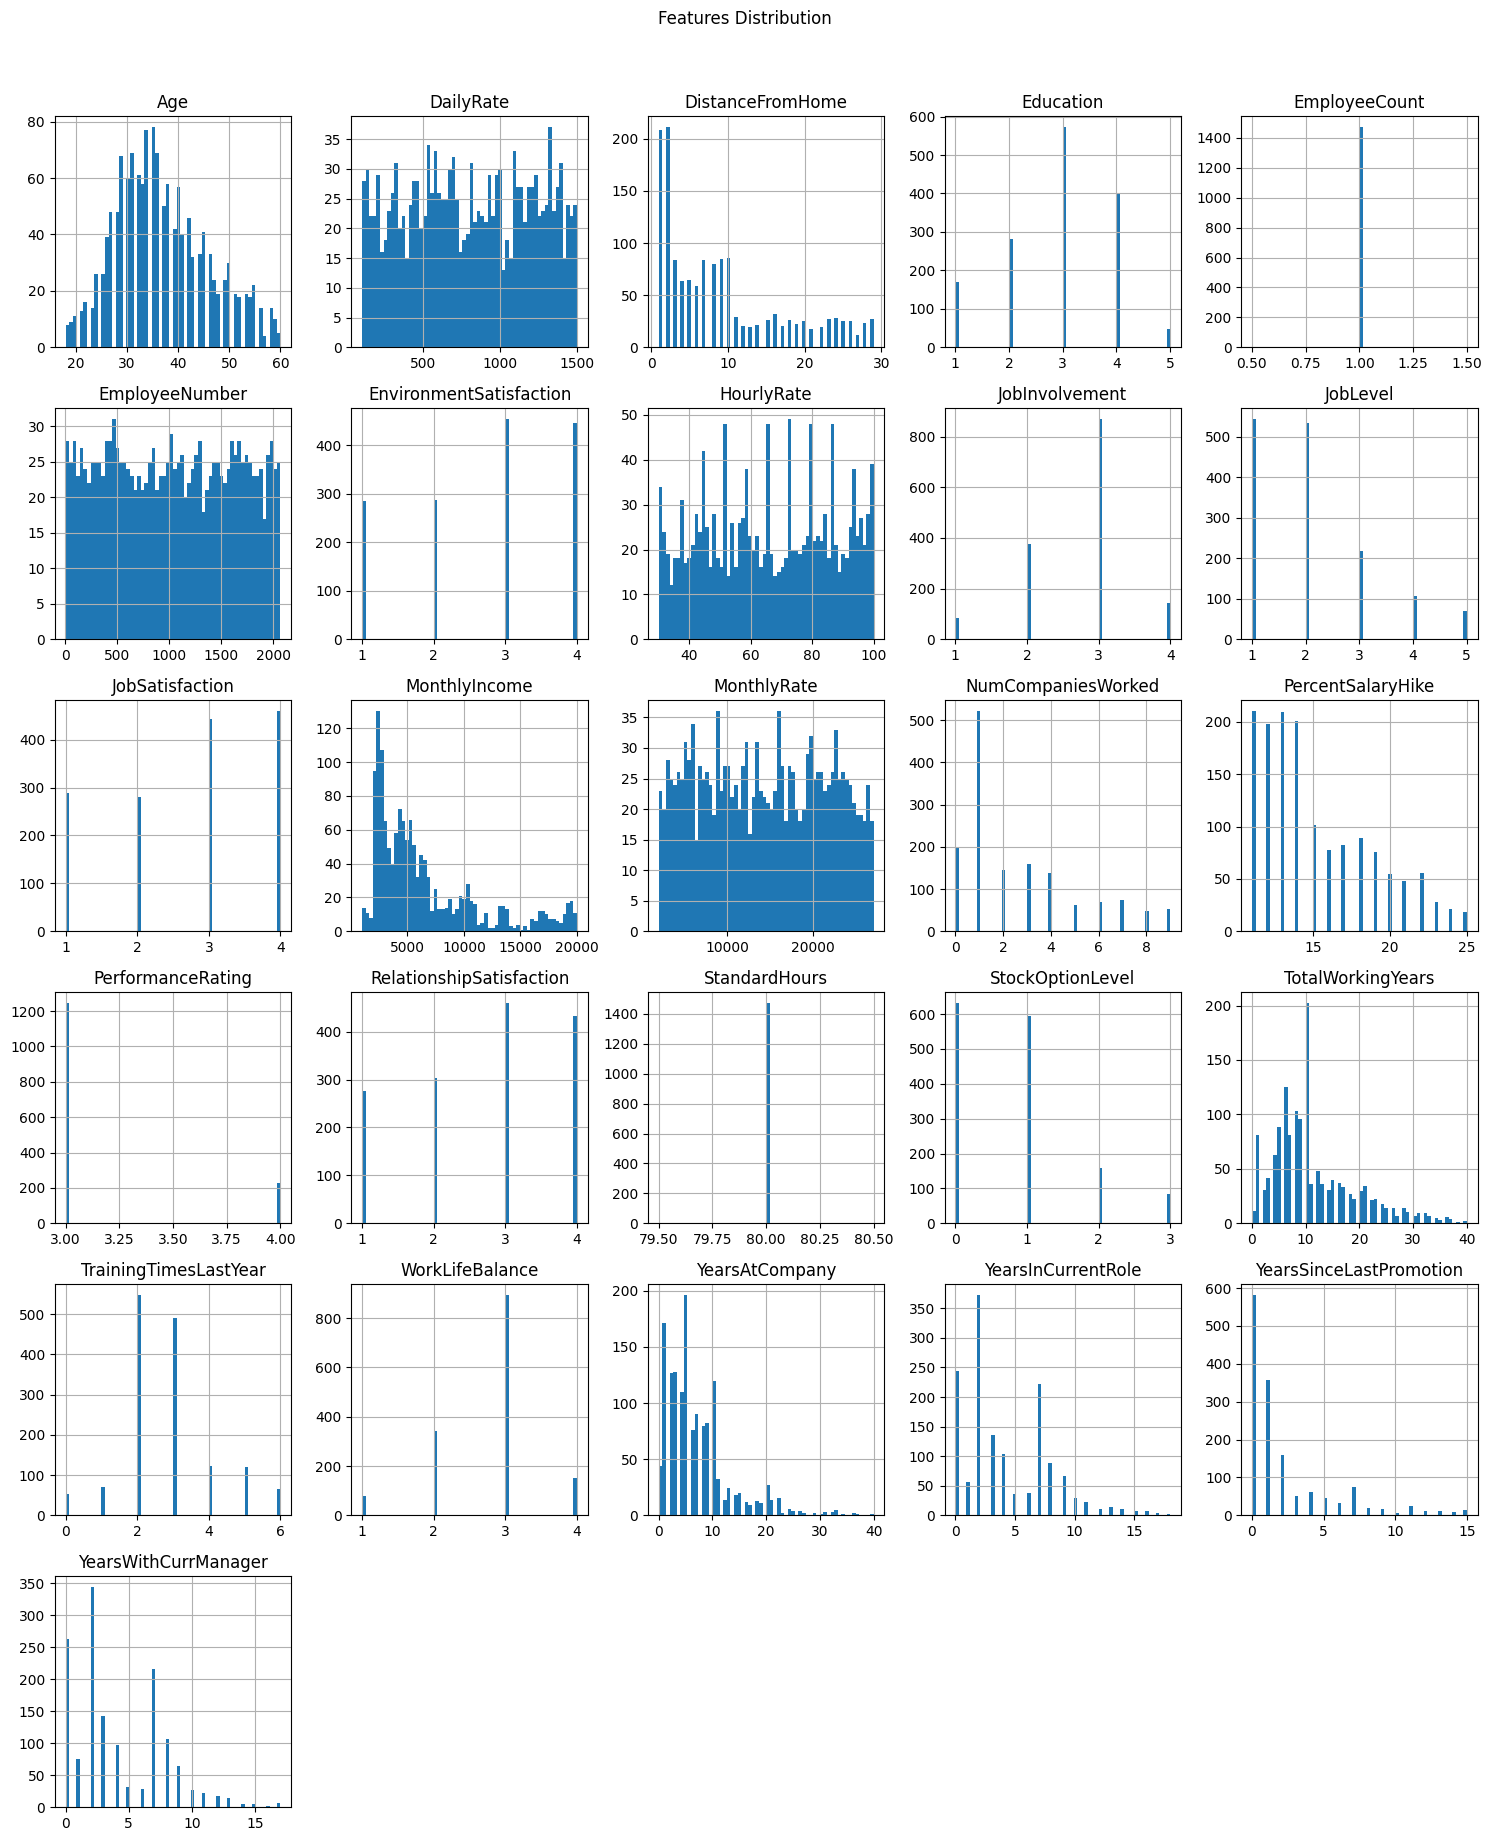

In [14]:
df.hist(figsize=(15,18),bins=60)
plt.suptitle('Features Distribution',x=0.5,y=1.02,ha='center',fontsize='large')
plt.tight_layout()
plt.show()

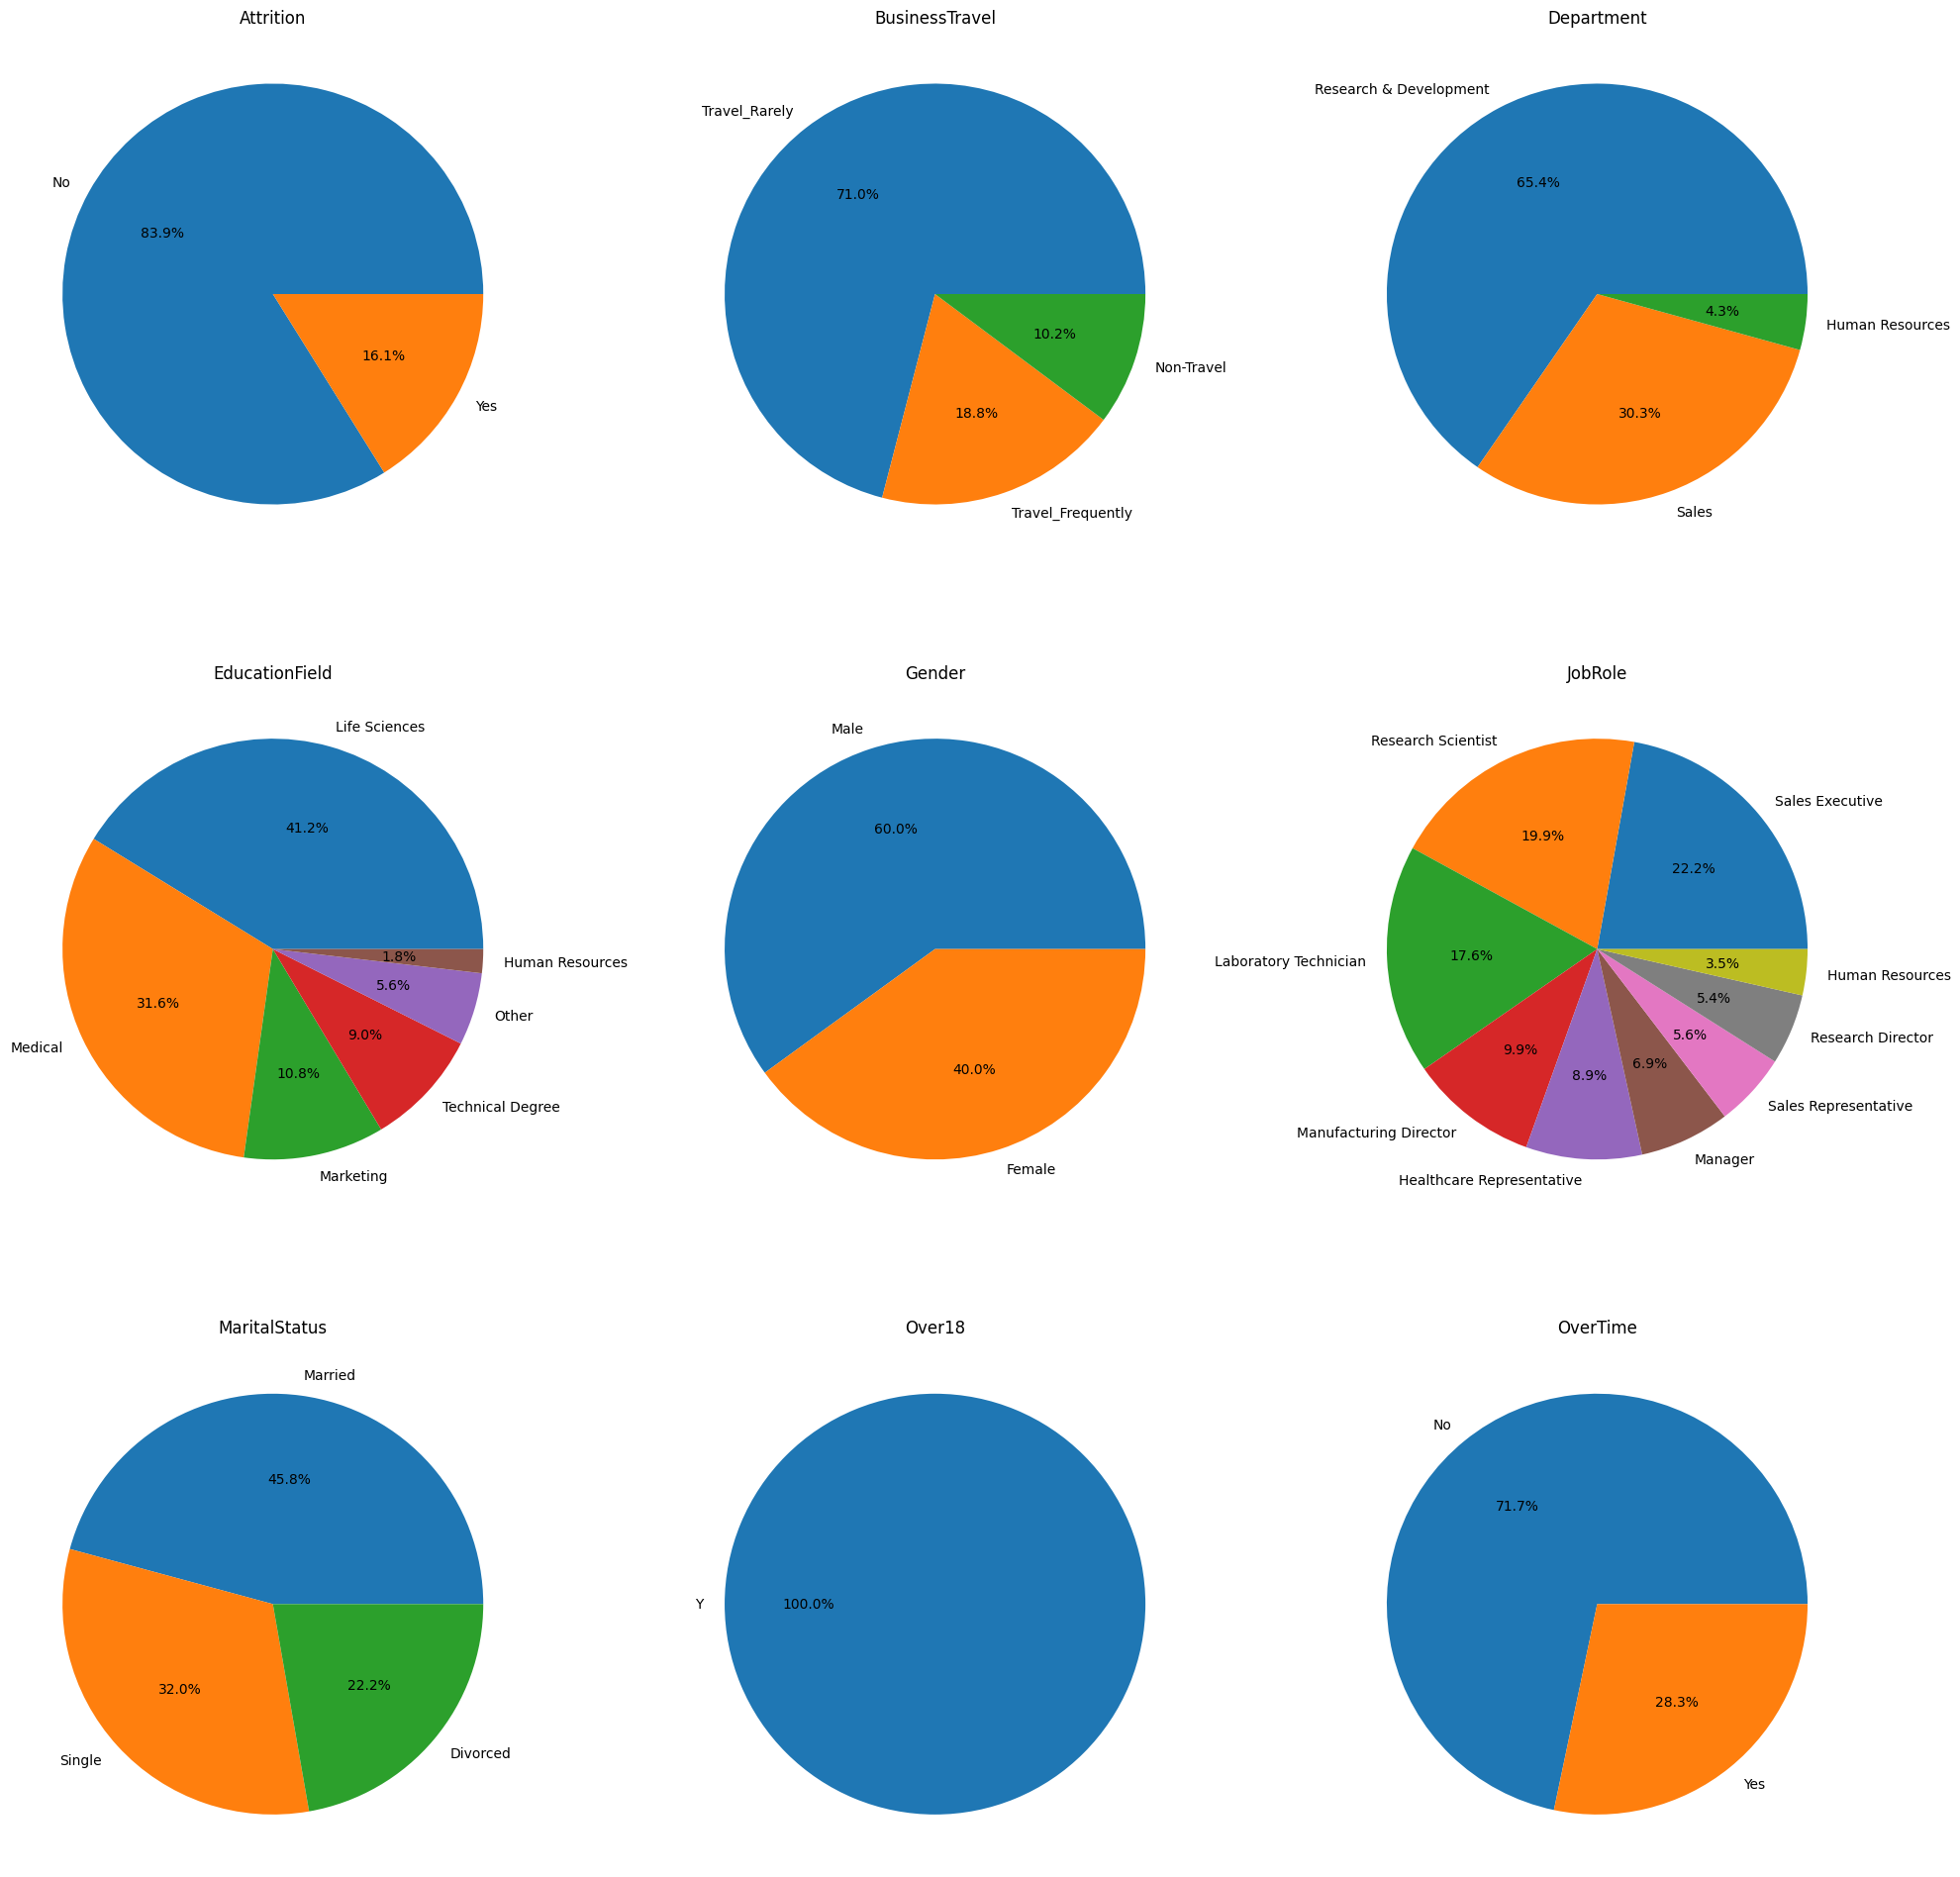

In [15]:
# Pie chart for feaatures that have object datatype using subplot
object_columns = df.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.flatten()
for i, j in zip(object_columns, axes):
    df[i].value_counts().plot.pie(autopct='%1.1f%%', ax=j)
    j.set_title(i)
    j.set_ylabel('')
plt.tight_layout()
plt.show()

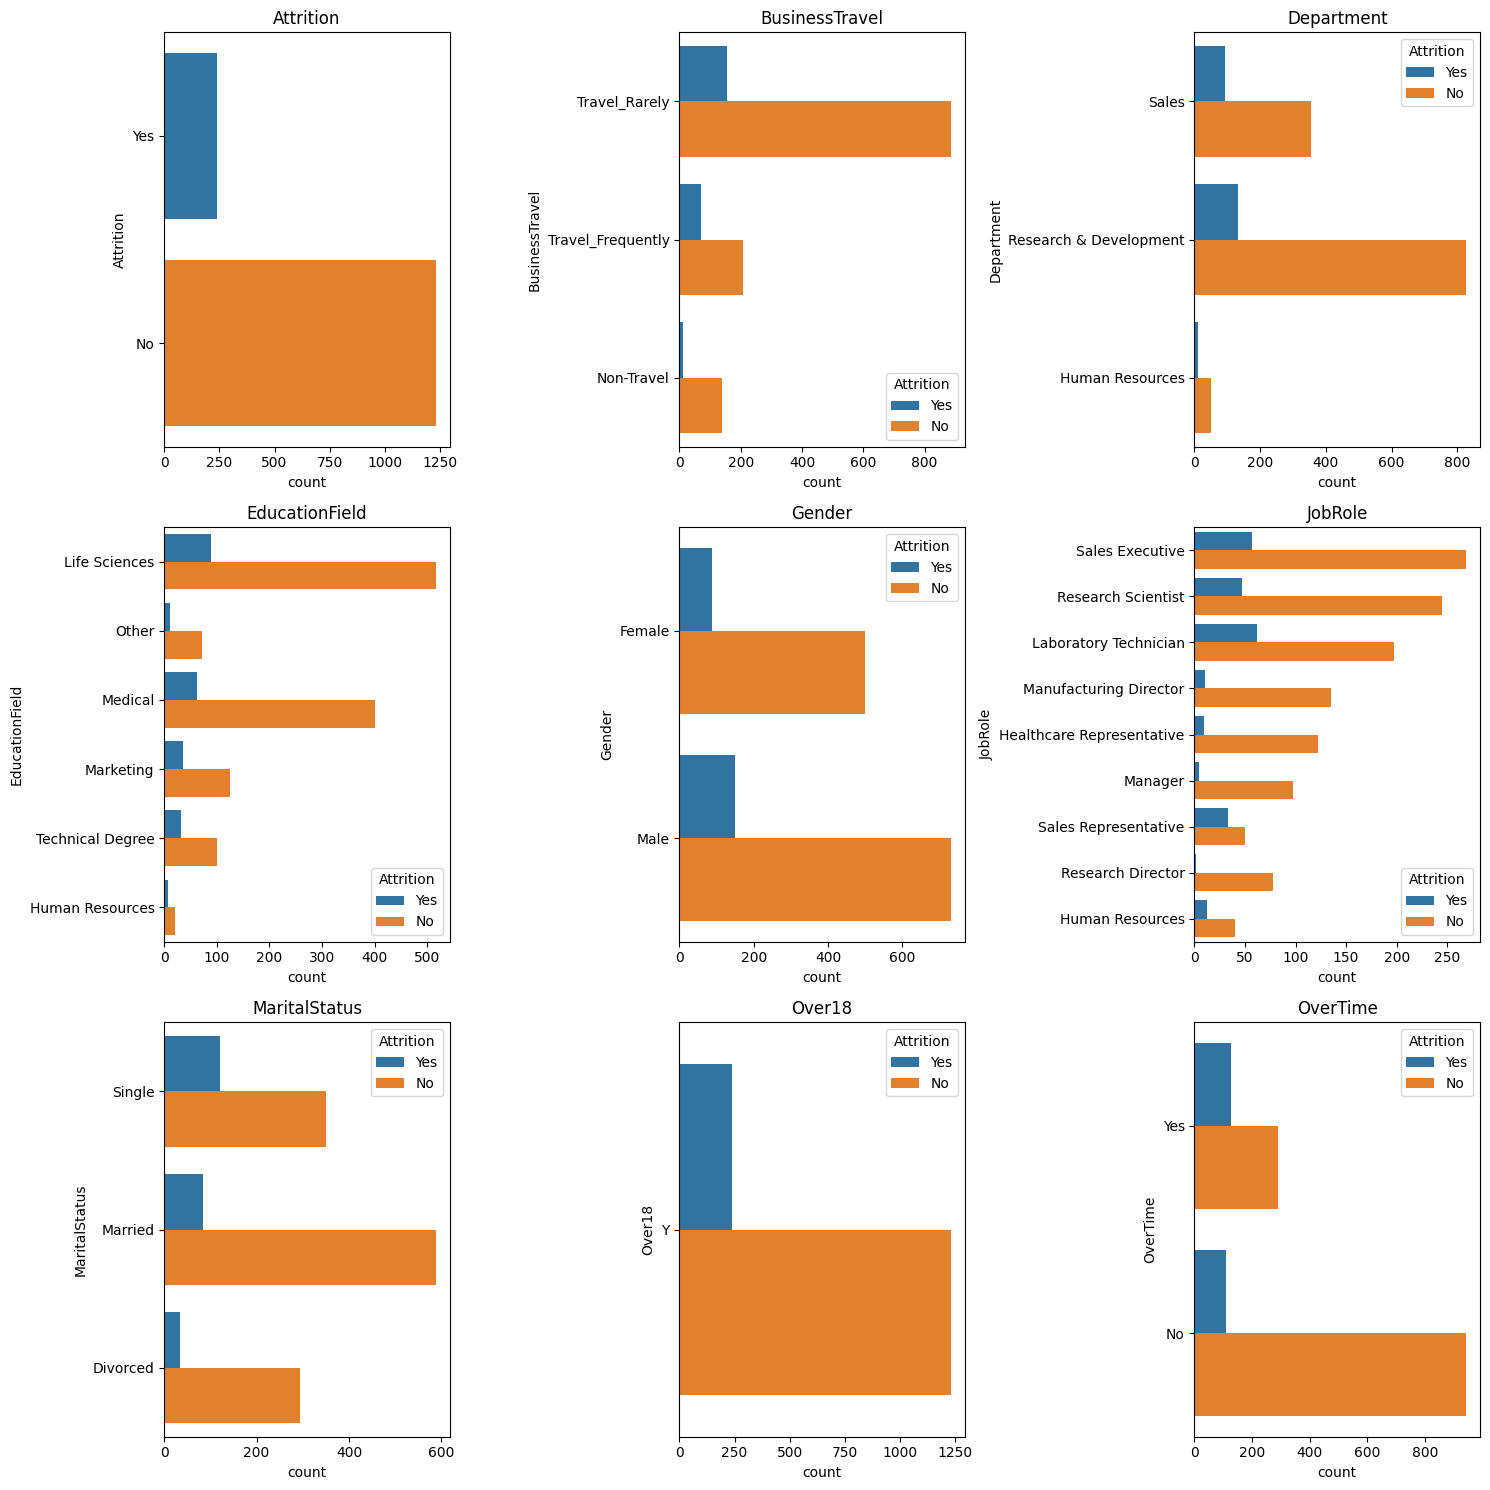

In [20]:
# Countplot for features that have object datatype using subplot
object_columns = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(15,15))
for i,col in enumerate(object_columns,1):
    plt.subplot(3,3,i)
    sns.countplot(data=df,y=col,hue='Attrition')
    plt.title(col)
plt.tight_layout()
plt.show()

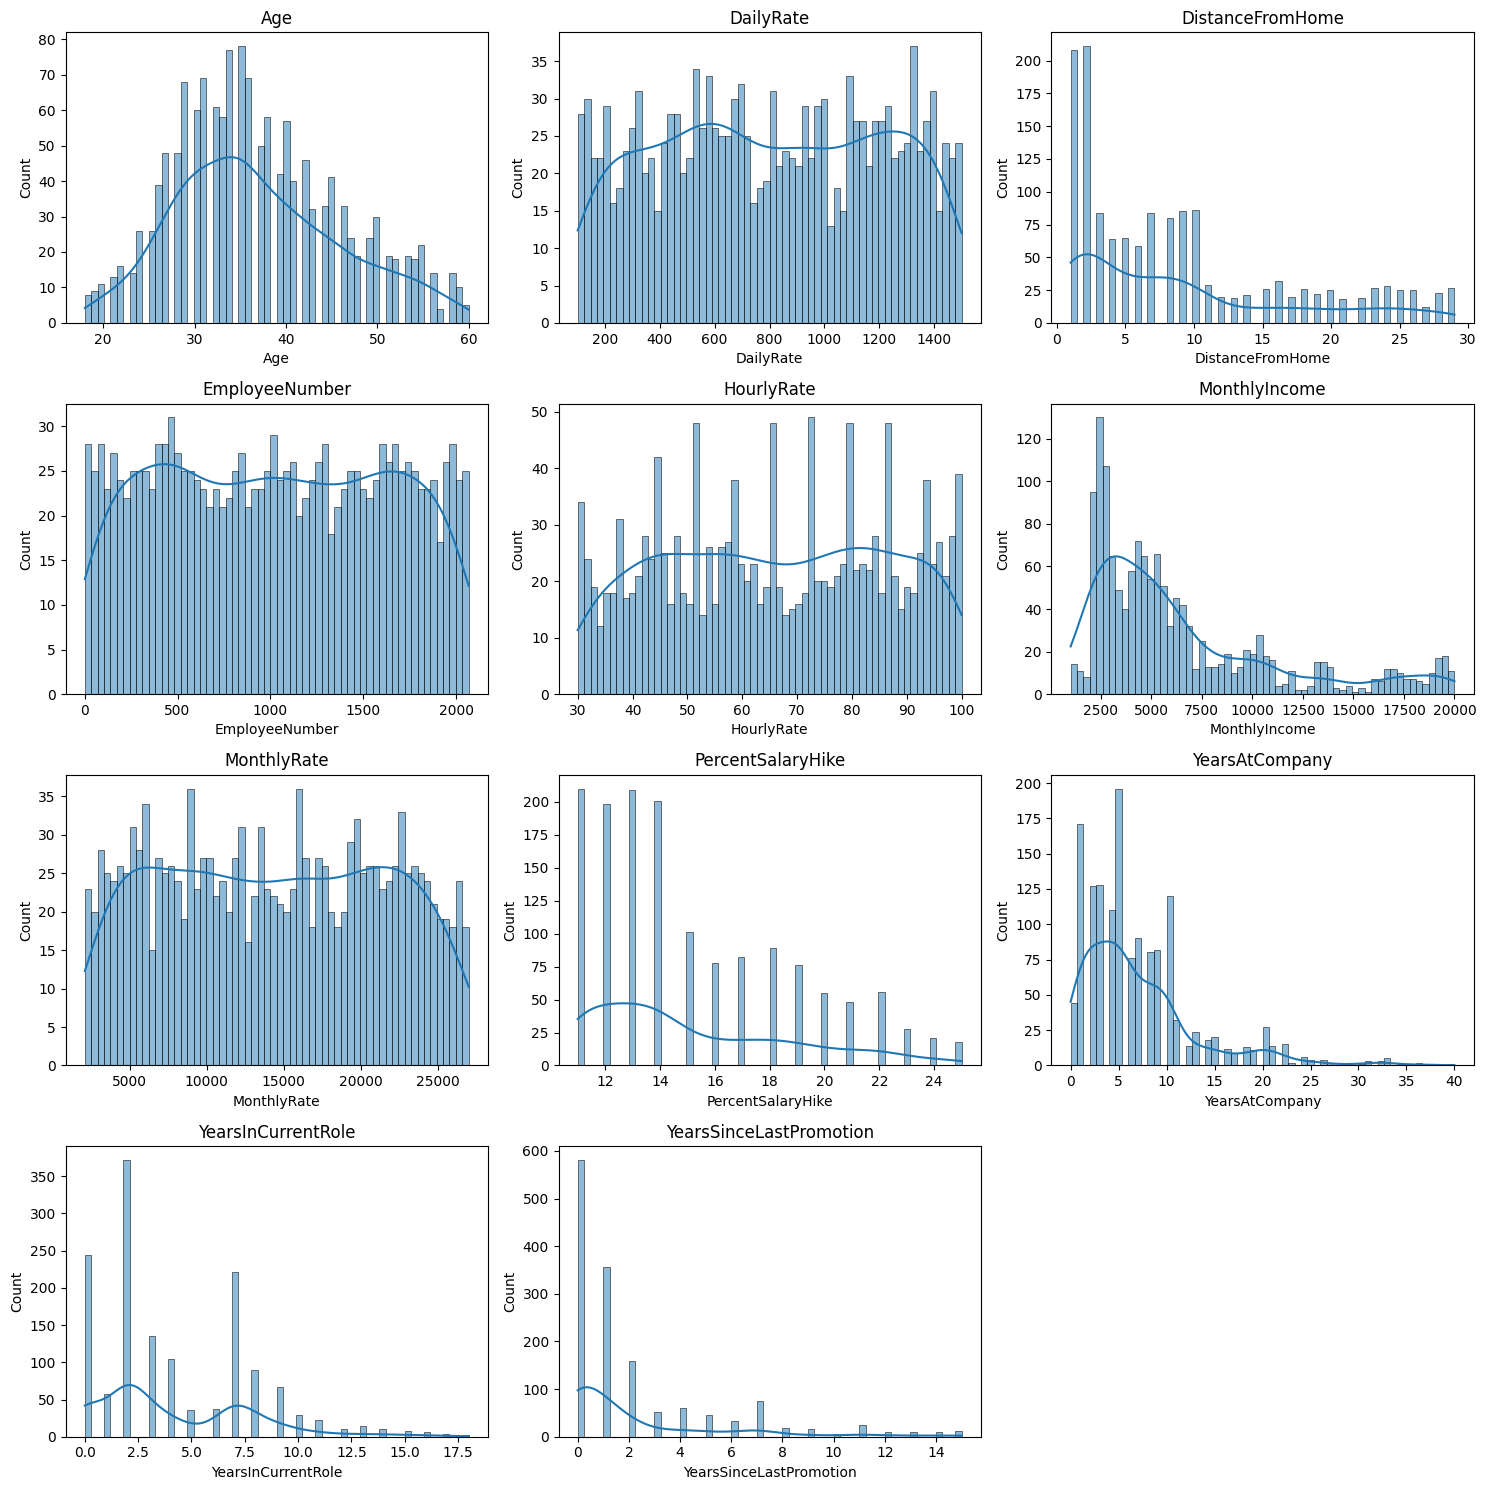

In [17]:
# histogram for features that have continuous values using subplot
continuous_columns = df[['Age','DailyRate','DistanceFromHome','EmployeeNumber','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','YearsAtCompany',
                         'YearsInCurrentRole','YearsSinceLastPromotion']]
plt.figure(figsize=(15,15))
for i,col in enumerate(continuous_columns,1):
    plt.subplot(4,3,i)
    sns.histplot(df[col],kde=True,bins=60)
    plt.title(col)
plt.tight_layout()
plt.show()

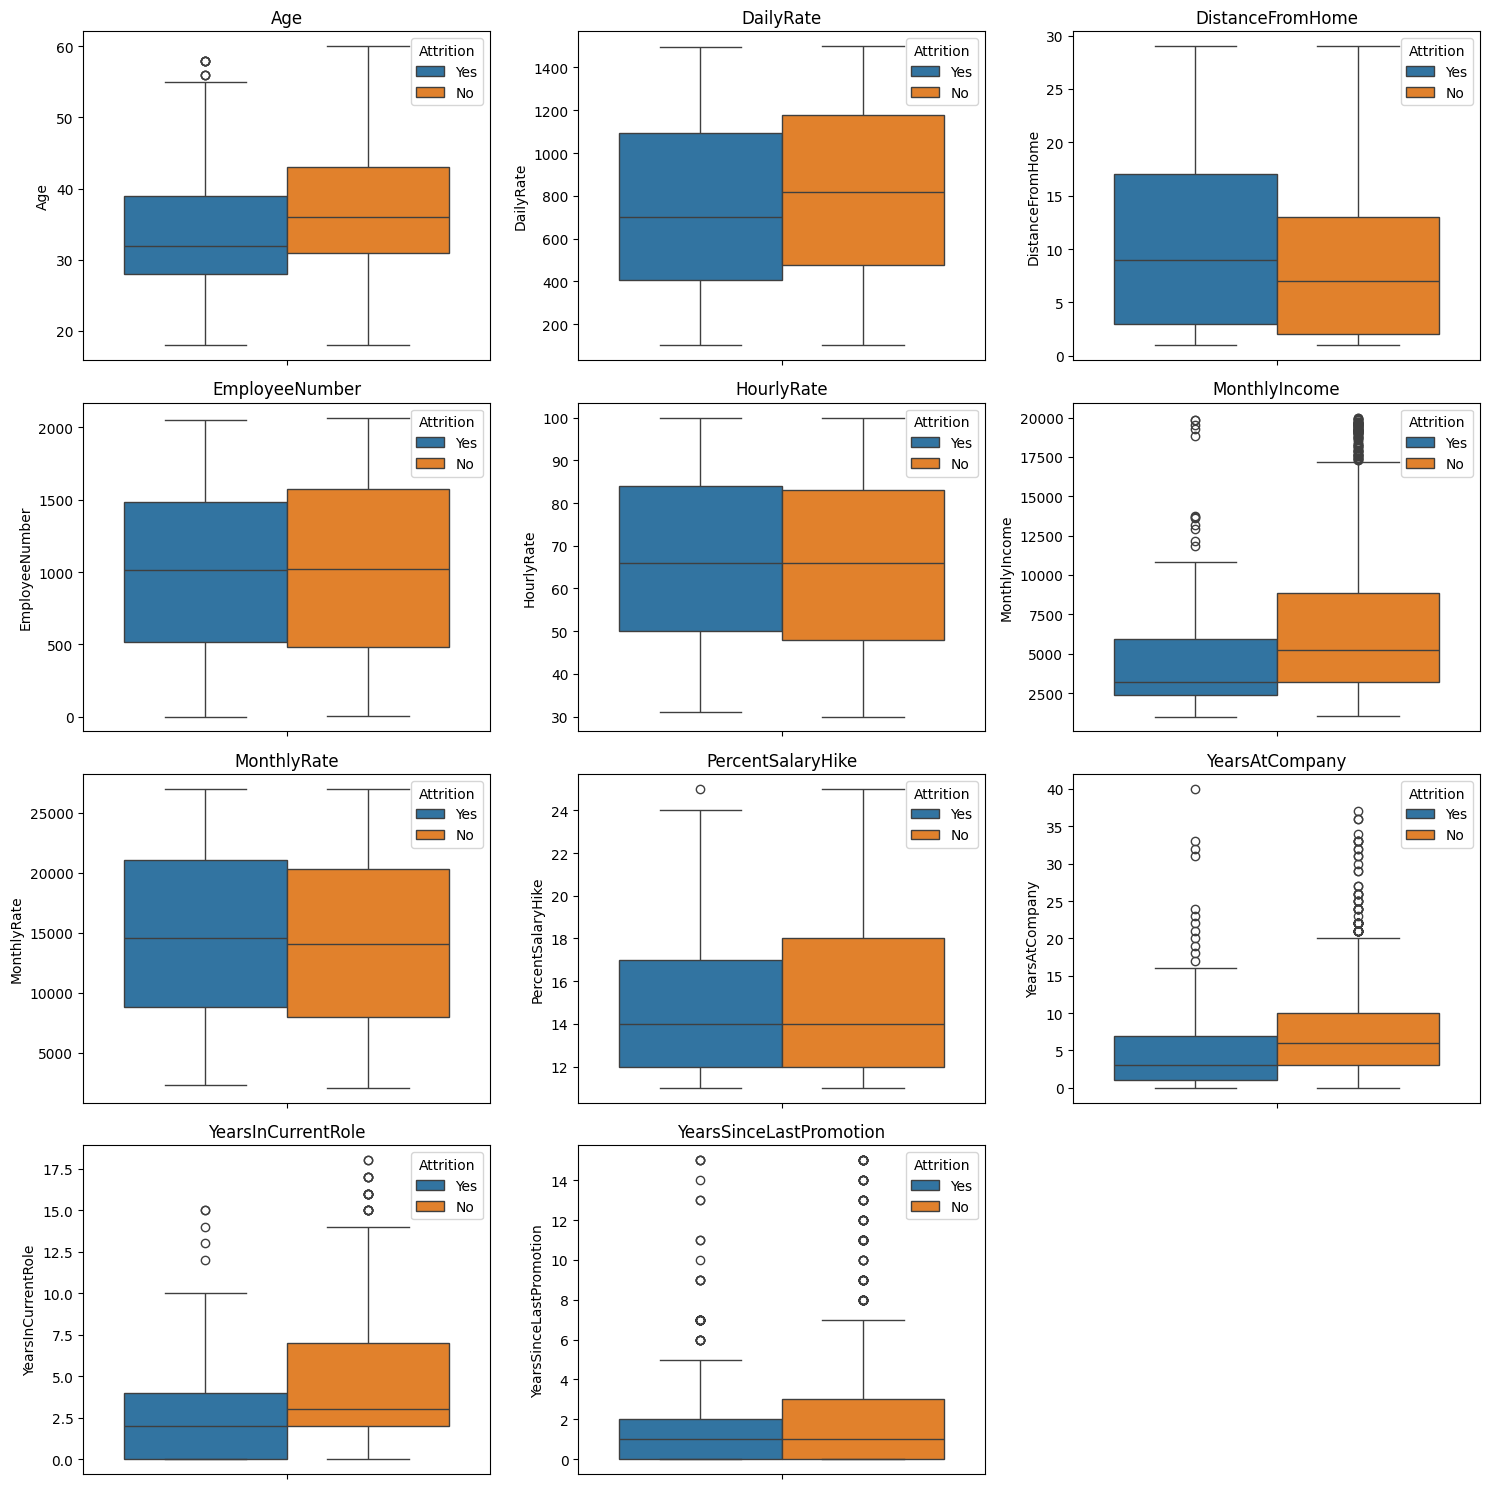

In [19]:
# boxplot for features that have continuous values using subplot
continuous_columns = df[['Age','DailyRate','DistanceFromHome','EmployeeNumber','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','YearsAtCompany',
                         'YearsInCurrentRole','YearsSinceLastPromotion']]
plt.figure(figsize=(15,15))
for i,col in enumerate(continuous_columns,1):
    plt.subplot(4,3,i)
    sns.boxplot(data=df,y=col,hue='Attrition')
    plt.title(col)
plt.tight_layout()
plt.show()

<Figure size 2000x1000 with 0 Axes>

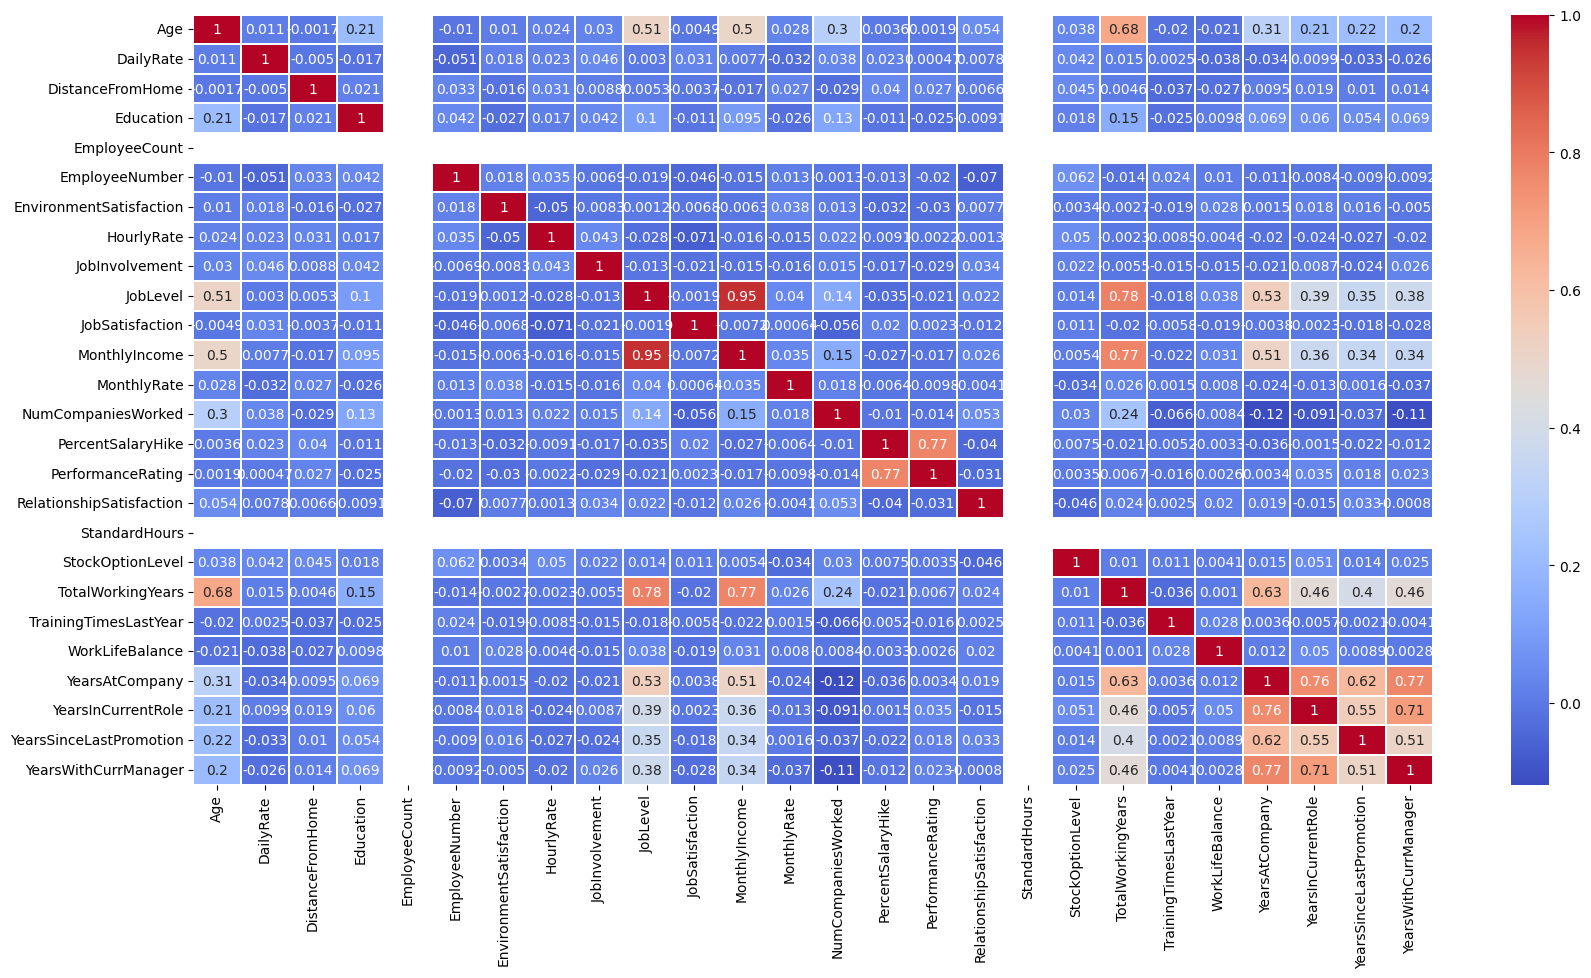

In [22]:
# correlation matrix
plt.figure(figsize=(20,10))
df_corr = df.drop(df.select_dtypes(include='object'),axis=1)
sns.heatmap(df_corr.corr(),annot=True,cmap='coolwarm', linecolor='white', linewidths=0.2)
plt.show()

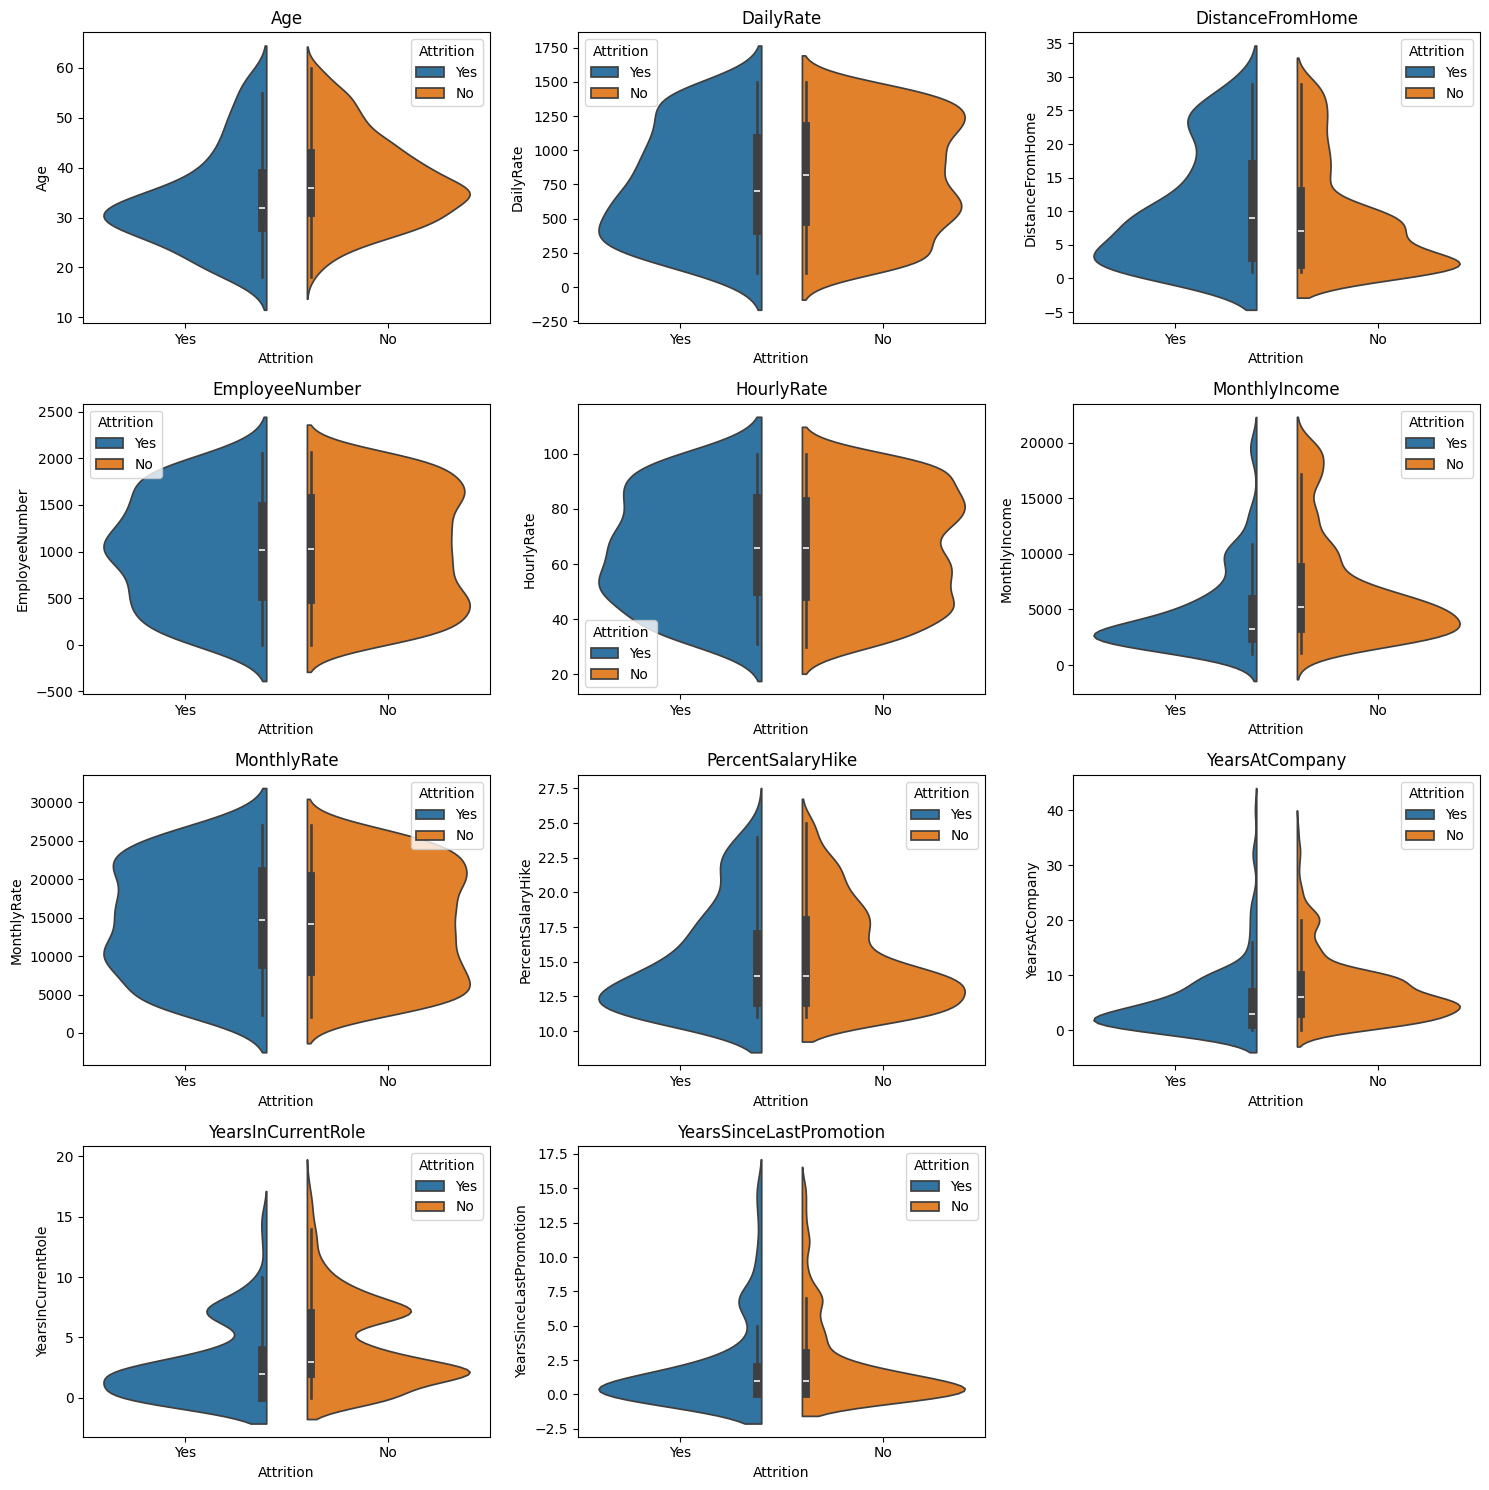

In [28]:
# violinplot for features that have continuous values using subplot
continuous_columns = df[['Age','DailyRate','DistanceFromHome','EmployeeNumber','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','YearsAtCompany',
                         'YearsInCurrentRole','YearsSinceLastPromotion']]
plt.figure(figsize=(15,15))
for i,col in enumerate(continuous_columns,1):
    plt.subplot(4,3,i)
    sns.violinplot(data=df,x='Attrition',y=col,hue='Attrition',split=True, legend=True)
    plt.title(col)
plt.tight_layout()
plt.show()

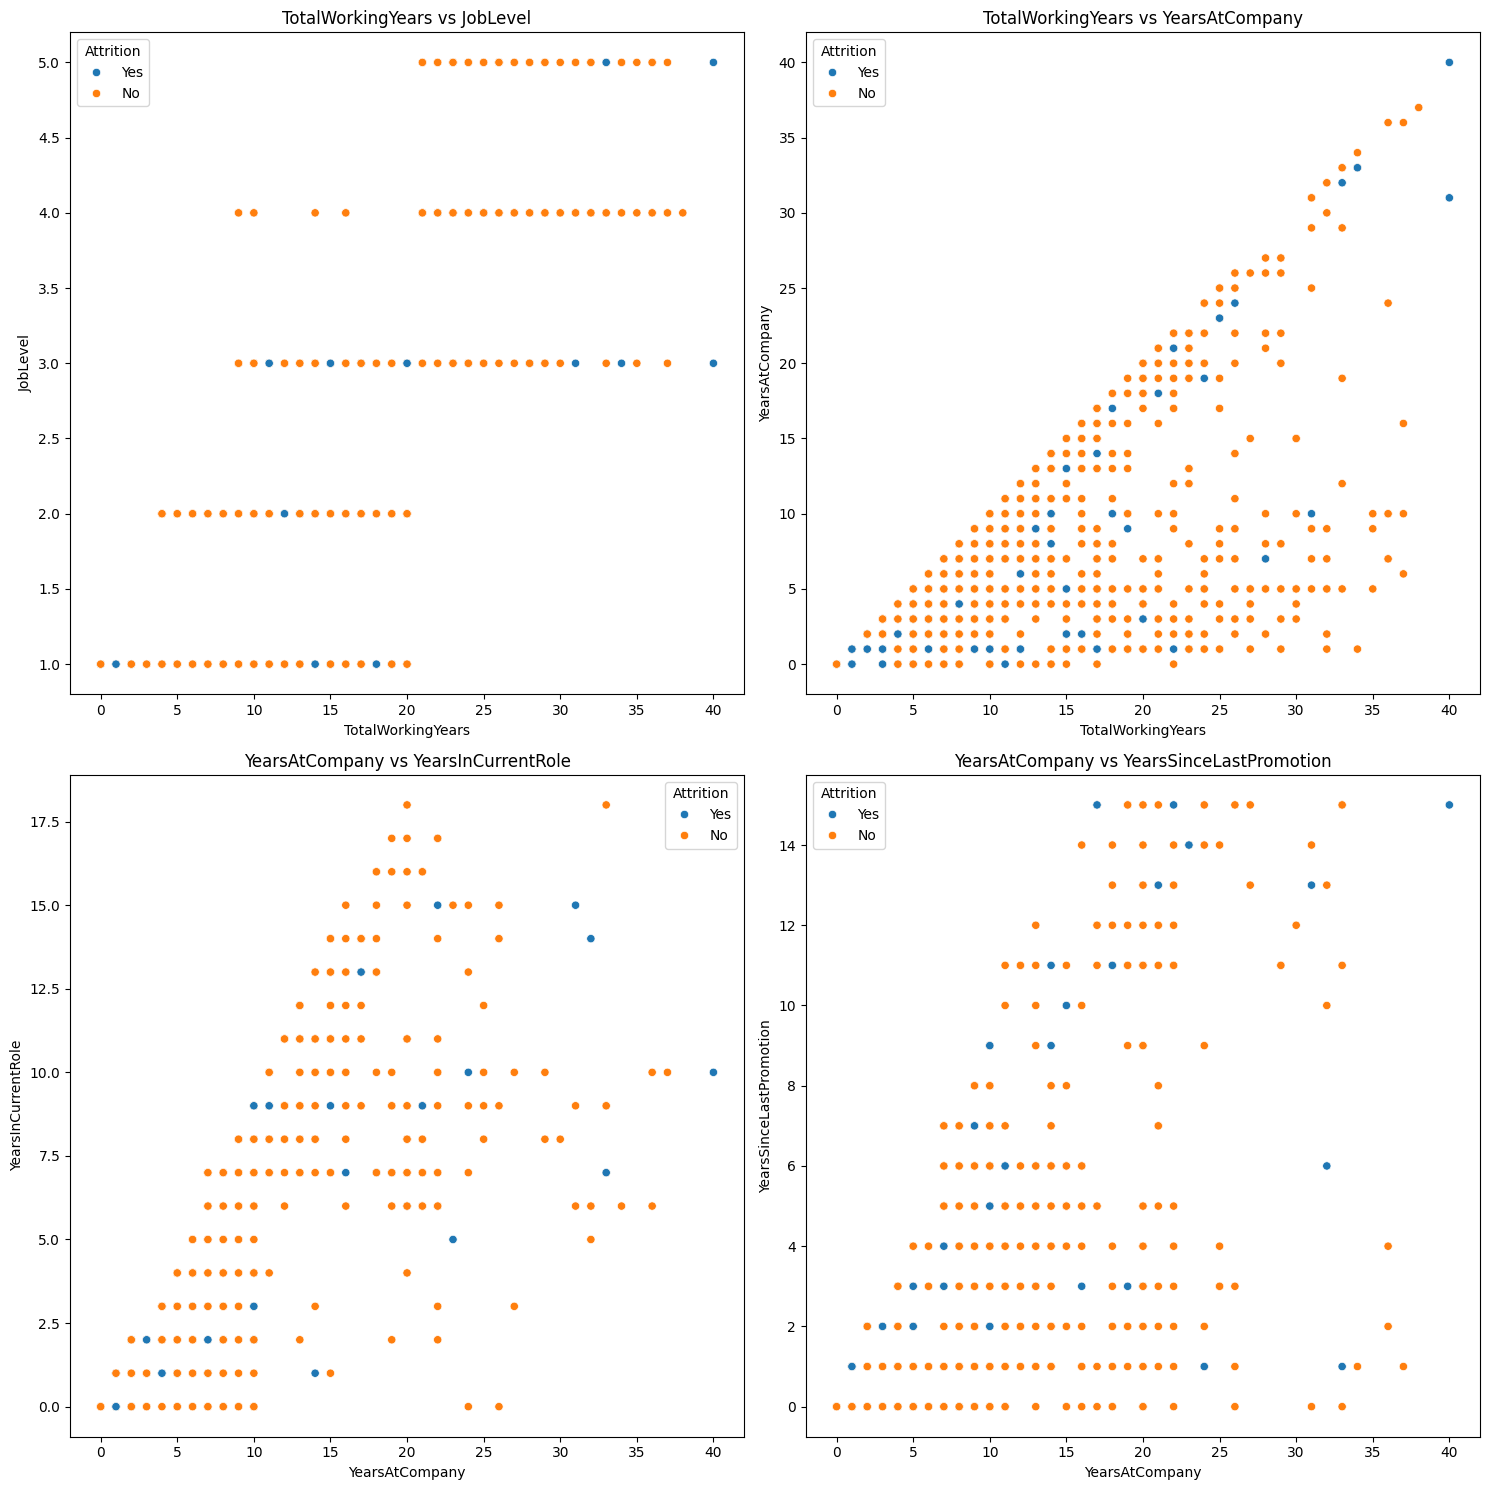

In [29]:
# scatterplot for features which is highly correlated with each other using subplot
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.scatterplot(data=df,x='TotalWorkingYears',y='JobLevel',hue='Attrition')
plt.title('TotalWorkingYears vs JobLevel')

plt.subplot(2,2,2)
sns.scatterplot(data=df,x='TotalWorkingYears',y='YearsAtCompany',hue='Attrition')
plt.title('TotalWorkingYears vs YearsAtCompany')

plt.subplot(2,2,3)
sns.scatterplot(data=df,x='YearsAtCompany',y='YearsInCurrentRole',hue='Attrition')
plt.title('YearsAtCompany vs YearsInCurrentRole')

plt.subplot(2,2,4)
sns.scatterplot(data=df,x='YearsAtCompany',y='YearsSinceLastPromotion',hue='Attrition')
plt.title('YearsAtCompany vs YearsSinceLastPromotion')

plt.tight_layout()
plt.show()

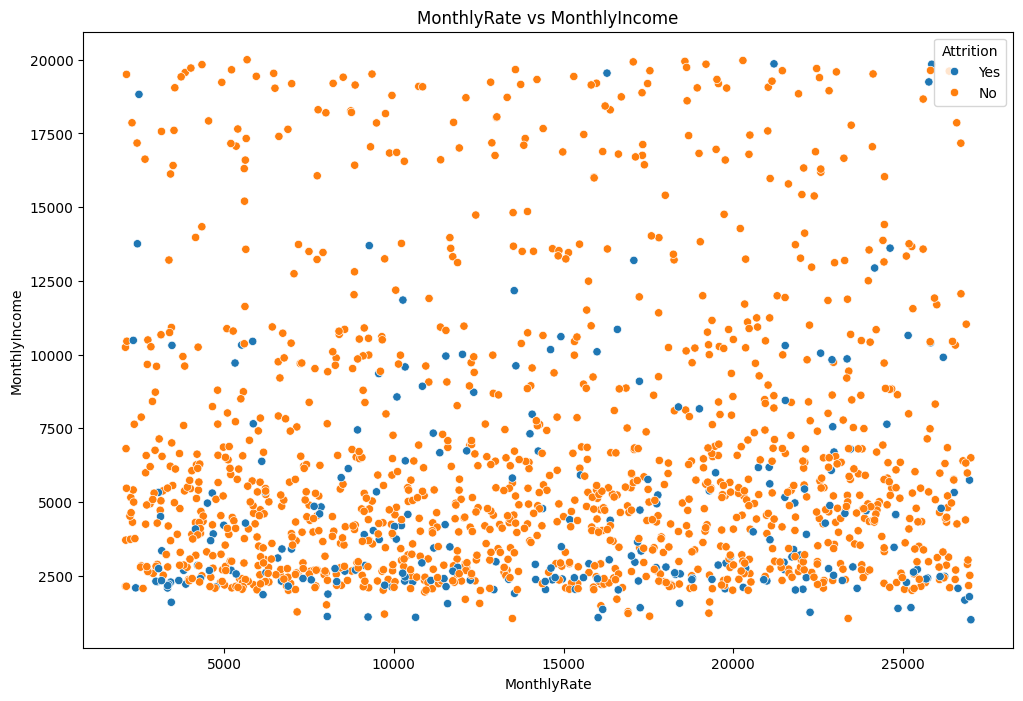

In [30]:
# scatter plot of feature MonthlyIncome vs MonthlyRate
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='MonthlyRate',y='MonthlyIncome',hue='Attrition')
plt.title('MonthlyRate vs MonthlyIncome')
plt.show()

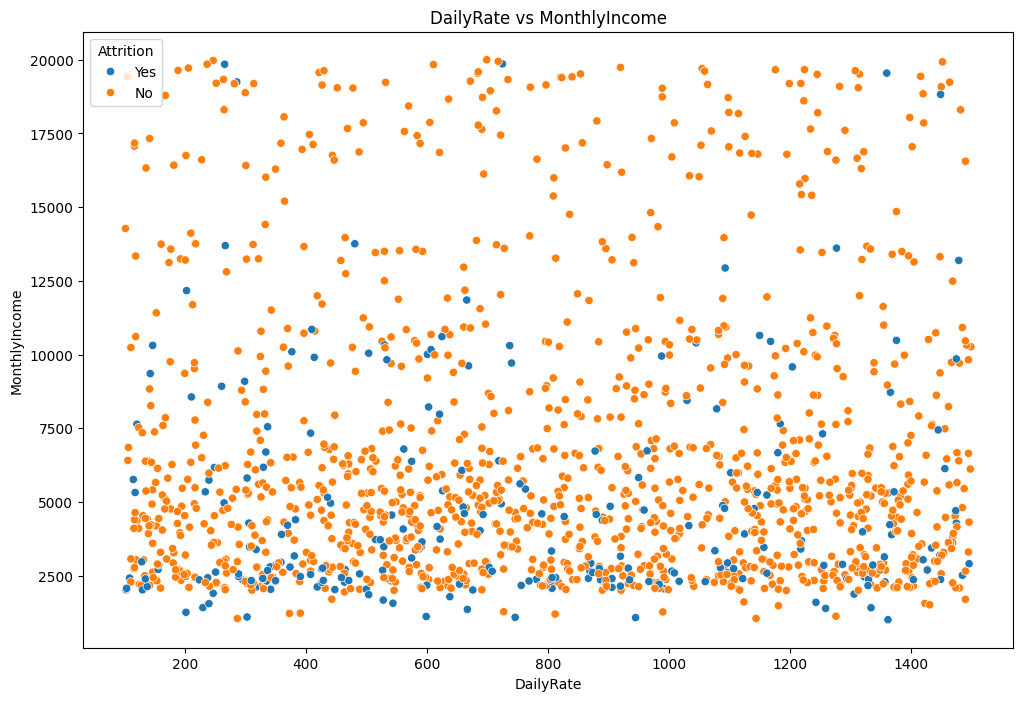

In [31]:
# scatter plot of feature MonthlyIncome vs DailyRate
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='DailyRate',y='MonthlyIncome',hue='Attrition')
plt.title('DailyRate vs MonthlyIncome')
plt.show()

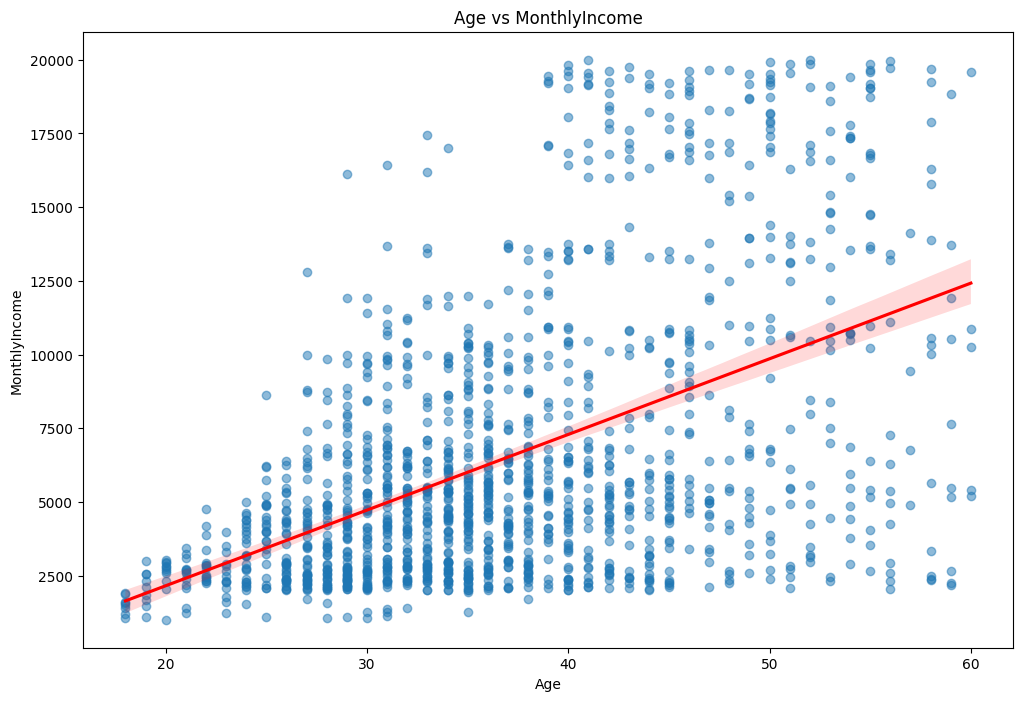

In [34]:
# scatter plot of feature MonthlyIncome vs Age
plt.figure(figsize=(12,8))
sns.regplot(data=df,x='Age',y='MonthlyIncome', scatter_kws={'alpha':0.5},line_kws={'color':'red'})
plt.title('Age vs MonthlyIncome')
plt.show()

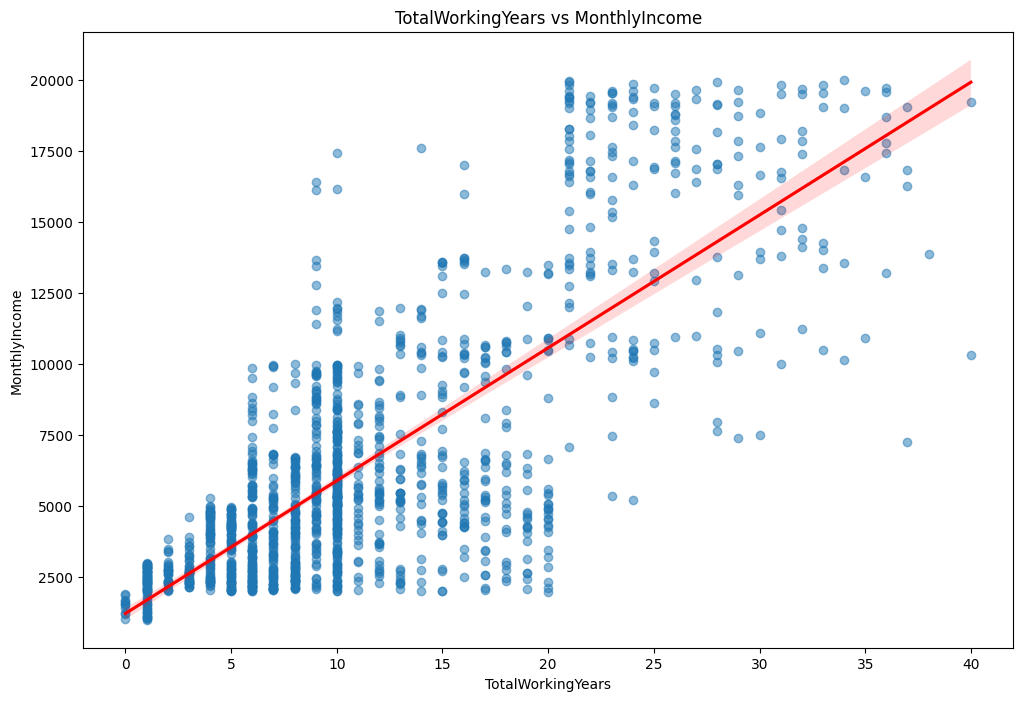

In [35]:
# scatter plot of feature MonthlyIncome vs TotalWorkingYears
plt.figure(figsize=(12,8))
sns.regplot(data=df,x='TotalWorkingYears',y='MonthlyIncome', scatter_kws={'alpha':0.5},line_kws={'color':'red'})
plt.title('TotalWorkingYears vs MonthlyIncome')
plt.show()

### 4. Feature Engineering

In [53]:
# drop irrelevant columns
df = df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis=1)

In [54]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

In [55]:
# number of numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64','float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print('Number of numerical columns:',len(numerical_columns))
print('Number of categorical columns:',len(categorical_columns))

Number of numerical columns: 23
Number of categorical columns: 8


In [56]:
# Let's check the unique values in each categorical column
for col in categorical_columns:
    print(f'Column: {col}')
    print(df[col].unique())
    print('\n')

Column: Attrition
['Yes' 'No']


Column: BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


Column: Department
['Sales' 'Research & Development' 'Human Resources']


Column: EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']


Column: Gender
['Female' 'Male']


Column: JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


Column: MaritalStatus
['Single' 'Married' 'Divorced']


Column: OverTime
['Yes' 'No']




In [57]:
# Use LabelEncoder to encode the categorical columns which have only two or three unique values
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        if len(df[col].unique()) <= 3:
            df[col] = label_encoder.fit_transform(df[col])


In [58]:
# Use Frequency Encoding to encode the categorical columns which have more than three unique values
encoder = ce.CountEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = encoder.fit_transform(df[col])

In [59]:
# check the unique values in each categorical column after encoding
for col in categorical_columns:
    print(f'Column: {col}')
    print(df[col].unique())
    print('\n')


Column: Attrition
[1 0]


Column: BusinessTravel
[2 1 0]


Column: Department
[2 1 0]


Column: EducationField
[606  82 464 159 132  27]


Column: Gender
[0 1]


Column: JobRole
[326 292 259 145 131 102  83  80  52]


Column: MaritalStatus
[2 1 0]


Column: OverTime
[1 0]




In [51]:
df.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2             606                        2       0  ...   
1          1             606                        3       1  ...   
2          2              82                        4       1  ...   
3          4             606                        4       0  ...   
4          1             464                        1       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

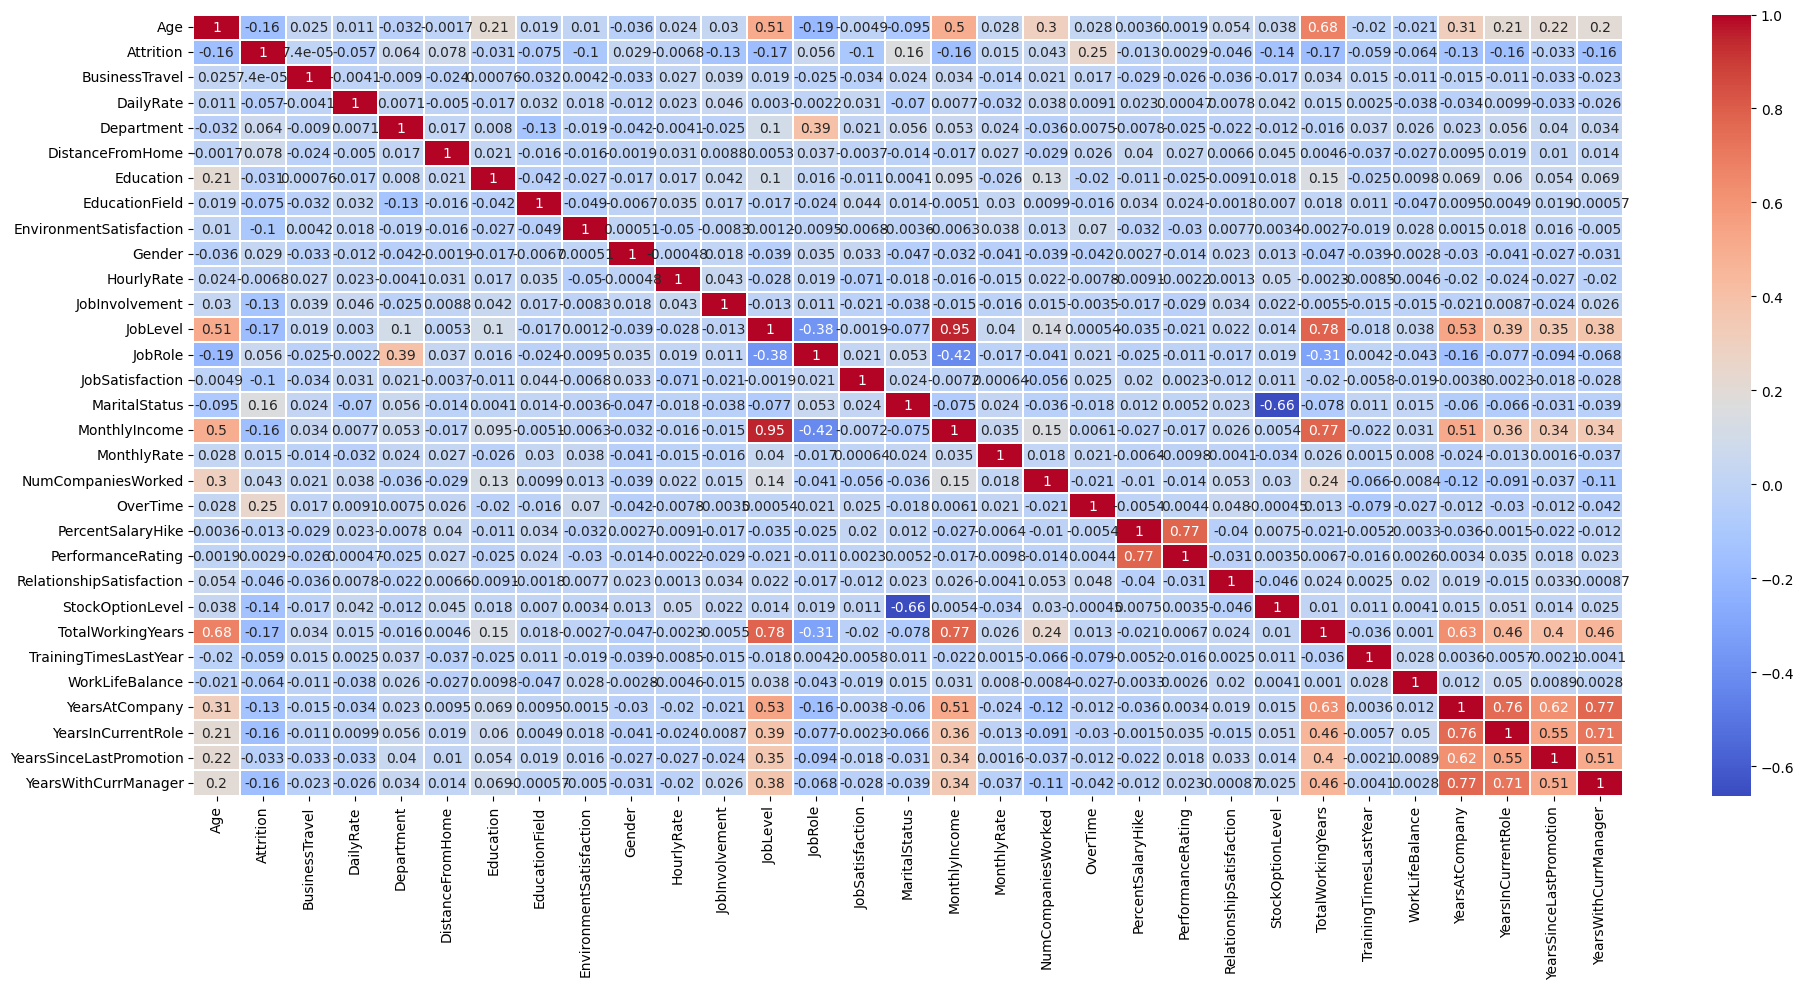

In [61]:
# Correlation matrix after encoding
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm', linecolor='white', linewidths=0.2)
plt.tight_layout()
plt.show()

### 5. Save Preprocessed Data for Machine Learning Modelling 

In [62]:
# save the preprocessed dataset
df.to_csv('Employee-Attrition-Preprocessed_Data.csv',index=False)
print('Preprocessed dataset saved successfully')

Preprocessed dataset saved successfully
